In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [10]:
df = pd.read_csv("forecasting_ready_1.csv")
df["Date"] = pd.to_datetime(df["Date"])

sku = df["SKU_ID"].unique()[0]

sku_df = df[df["SKU_ID"] == sku].sort_values("Date")

ts = sku_df.set_index("Date")["Units_Sold"].asfreq("D")

In [11]:
split_days = 60

train = ts[:-split_days]
test = ts[-split_days:]

In [ ]:
model = SARIMAX(
    train,
    order=(2,1,3),
    seasonal_order=(1,1,1,365),   # yearly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

fit = model.fit()

c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
forecast = fit.forecast(steps=split_days)

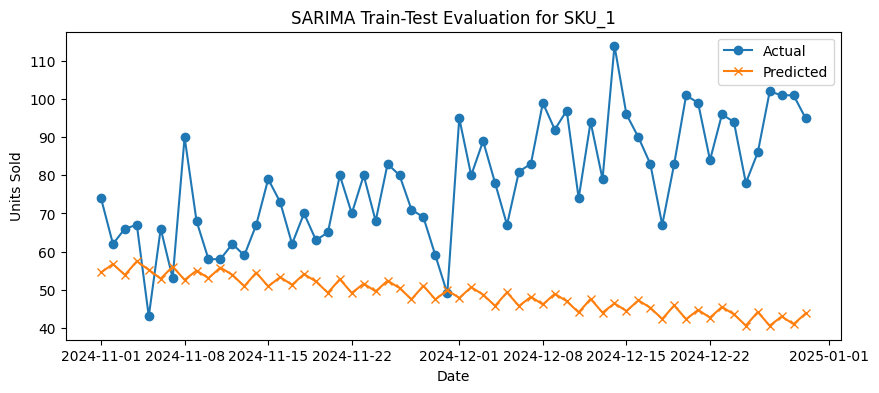

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(test.index, test.values, label="Actual", marker="o")
plt.plot(test.index, forecast.values, label="Predicted", marker="x")
plt.legend()
plt.title(f"SARIMA Train-Test Evaluation for {sku}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

In [ ]:
mae = np.mean(np.abs(test.values - forecast.values))
rmse = np.sqrt(np.mean((test.values - forecast.values)**2))

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

MAE  : 29.88
RMSE : 34.67


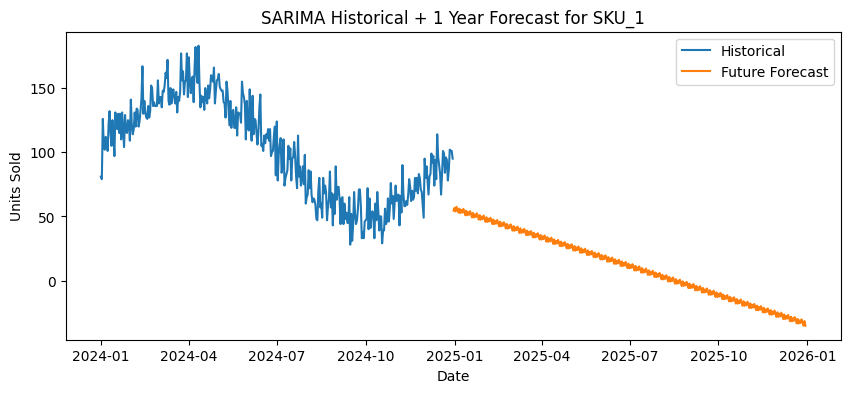

In [ ]:
steps = 365

forecast_future = fit.forecast(steps=steps)

future_dates = pd.date_range(
    start=ts.index.max() + pd.Timedelta(days=1),
    periods=steps,
    freq="D"
)


plt.figure(figsize=(10,4))
plt.plot(ts.index, ts.values, label="Historical")
plt.plot(future_dates, forecast_future.values, label="Future Forecast")
plt.legend()
plt.title(f"SARIMA Historical + 1 Year Forecast for {sku}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()
